## Equações diferenciais parciais elípticas: Equação de Poisson

**Autor:** Tiago Buriol

**Fonte:**
Burden, Richard, L. et al. Análise Numérica - Tradução da 10ª edição norte-americana. Disponível em: Minha Biblioteca, (3rd edição). Cengage Learning Brasil, 2016.
https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/820

Considere a equação de Poisson:

$$\nabla^2 u(x, y) \equiv \frac{\partial^2 u}{\partial x^2}(x, y)+\frac{\partial^2 u}{\partial y^2}(x, y)=f(x, y)$$

em $R=\{(x, y) \mid a<x<b, c<y<d\}$, com $u(x, y)=g(x, y)$ para $(x, y) \in S$, em que $S$ denota a fronteira de $R$. Se $f$ e $g$ forem continuas em seu dominio, então existe uma única solução para esta equação.

**Escolhendo a malha**

A primeira etapa para a resolução numérica da equação de Poisson pelo método das diferenças finitas nesse domínio é gerar uma malha retangular discretizando a região $R$. Para isso podemos escolher o número de subintervalos $m$ e $n$, nas direções $x$ e $y$, e obter s tamanhos dos passos em cada direção fazendo $h=(b-a) / n$ e $k=(d-c) / m$. Então dividimos o intervalo $[a,b]$ em $n$ partes iguais de largura $h$ e o intervalo $[c,d]$ em $m$ partes iguais de tamanho $k$

**Exemplo 1:** Discretização de uma região retangular.

Considere a região $R=\{(x, y) \mid -1<x<3, -2<y<4\}$ e os passos $h=0.5$ e $k=0.6$ nas direções $x$ e $y$ respectivamente. Obtenha as coodenadas dos pontos da malha retangular.

*Solução:* 
A malha será como uma grade no retângulo $R$ formada por linhas verticais e horizontais contendo os pontos com coordenadas $\left(x_i, y_j\right)$, em que

$$
x_i=a+i h \text {, para cada } i=0,1, \ldots, n \quad \text { e } y_i=c+j k \text {, para cada } j=0,1, \ldots, m \text {. }
$$

com $a=-1$, $b=3$, $c=-2$, $d=4$, $n=\frac{3-(-1)}{0.5}=8$ e $m=\frac{4-(-2)}{0.6}=10$.

Em Python, podemos obter as coordenadas dos pontos como é mostrado a seguir: 

In [130]:
a=-1; b=3; h = 0.5
c=-2; d=4; k = 0.6

n = int((b-a)/h)
m = int((d-c)/k)
pontos = []
for i in range(n+1):
    for j in range(m+1):
        x = a + i*h
        y = b + j*k
        pontos.append((x,y))
print(pontos)

[(-1.0, 3.0), (-1.0, 3.6), (-1.0, 4.2), (-1.0, 4.8), (-1.0, 5.4), (-1.0, 6.0), (-1.0, 6.6), (-1.0, 7.2), (-1.0, 7.8), (-1.0, 8.399999999999999), (-1.0, 9.0), (-0.5, 3.0), (-0.5, 3.6), (-0.5, 4.2), (-0.5, 4.8), (-0.5, 5.4), (-0.5, 6.0), (-0.5, 6.6), (-0.5, 7.2), (-0.5, 7.8), (-0.5, 8.399999999999999), (-0.5, 9.0), (0.0, 3.0), (0.0, 3.6), (0.0, 4.2), (0.0, 4.8), (0.0, 5.4), (0.0, 6.0), (0.0, 6.6), (0.0, 7.2), (0.0, 7.8), (0.0, 8.399999999999999), (0.0, 9.0), (0.5, 3.0), (0.5, 3.6), (0.5, 4.2), (0.5, 4.8), (0.5, 5.4), (0.5, 6.0), (0.5, 6.6), (0.5, 7.2), (0.5, 7.8), (0.5, 8.399999999999999), (0.5, 9.0), (1.0, 3.0), (1.0, 3.6), (1.0, 4.2), (1.0, 4.8), (1.0, 5.4), (1.0, 6.0), (1.0, 6.6), (1.0, 7.2), (1.0, 7.8), (1.0, 8.399999999999999), (1.0, 9.0), (1.5, 3.0), (1.5, 3.6), (1.5, 4.2), (1.5, 4.8), (1.5, 5.4), (1.5, 6.0), (1.5, 6.6), (1.5, 7.2), (1.5, 7.8), (1.5, 8.399999999999999), (1.5, 9.0), (2.0, 3.0), (2.0, 3.6), (2.0, 4.2), (2.0, 4.8), (2.0, 5.4), (2.0, 6.0), (2.0, 6.6), (2.0, 7.2), (2.0,

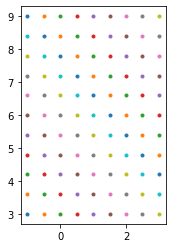

In [138]:
import matplotlib.pyplot as plt
for p in pontos:
    plt.plot(p[0],p[1],'.')
    plt.gca().set_aspect('equal')

Ou, de outra forma, usando a função `linspace`o intervalo $[a,b]$ deve ser dividido em $n+1$ pontos igualmente espaçados que darão as coordenadas $x_i$, $i=0,...,n$ dos pontos da malha. Analogamente,  o intervalo $[c,d]$ deve ser dividido em $m+1$ pontos igualmente espaçados que darão as coordenadas $y_j$, $j=0,...,m$. A malha então será composta por $9 \times 11$ pontos. Então, com a função `mesgrid`criamos matrizes com as coordenadas $x$ e $y$, respectivamente, de cada ponto. Esse método é muito conveniente para métodos numéricos.


In [139]:
import numpy as np
x = np.linspace(a,b,n+1)
y = np.linspace(c,d,m+1)
xi, yj = np.meshgrid(x,y)

In [140]:
print(xi)
print(yj)

[[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]
 [-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4 -1.4]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2 -0.2]
 [ 0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4]
 [ 1.   1.   1.   1.   1.   1.   1.   1.   1. ]
 [ 1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.6  1.6]
 [ 2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2  2.2]
 [ 2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8  2.8]
 [ 3.4  3.4  3.4  3.4  3.4  3.4  3.4  3

Podemos obter uma visualização da malha fazendo:

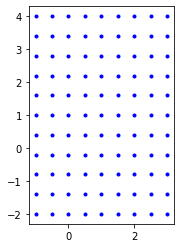

In [141]:
import matplotlib.pyplot as plt
plt.plot(xi,yj,'b.')
plt.gca().set_aspect('equal')

**Obtendo as equações de diferenças finitas**

Usamos a série de Taylor na variável $x$ em torno de $x_i$ para gerar a fórmula de diferenças centradas

$$
\frac{\partial^2 u}{\partial x^2}\left(x_i, y_j\right) \approx
\frac{u\left(x_{i+1}, y_j\right)-2 u\left(x_i, y_j\right)+u\left(x_{i-1}, y_j\right)}{h^2}
$$

e na variável $y$ em torno de $y_j$ para gerar a fórmula 

$$
\frac{\partial^2 u}{\partial y^2}\left(x_i, y_j\right)
\approx
\frac{u\left(x_i, y_{j+1}\right)-2 u\left(x_i, y_j\right)+u\left(x_i, y_{j-1}\right)}{k^2}
$$


A utilização destas fórmulas nos permite expressar a equação de Poisson 

$$\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=f$$


nos pontos $\left(x_i, y_j\right)$ como

$$
\frac{u_{i-1,j}-2 u_{i,j}+u_{i+1,j}}{h^2}+
\frac{u_{i,j-1}-2 u_{i,j}+u_{i,j+1}}{k^2}
\approx
f_{i,j}
$$


em que $u_{i,j}=u(x_i, y_j)$ e $f_{i,j}= f(x_i, y_j)$. Com $(x_i,y_i)$, $i=0,...,n$ e $j=0,...,m$ sendo as coordenadas dos pontos da malha.


Note que, conhecidas as condições de contorno, ou seja os valores para $u(x_0,y_j)$, $u(x_n,y_j)$, $u(x_i,y_0)$ e $u(x_i,y_m)$, as equações para cada ponto interno da malha fornecem um sistema linear cuja solução fornece a resolução numérica do problema.

Note também que cada equação envolve o valor da função em um ponto interno da malha e os quatro pontos vizinhos a ele, em cima, em baixo, à direita e à esquerda.

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/stenil.png?raw=true" width="380">

Desprezando o erro, multiplicando a equação por $h^2$ e rearranjando os termos, obtemos a equação de diferenças finitas, em que $w$ é a aproximação para $u$, e que pode ser expressa como:


$$(w_{i-1,j}+w_{i+1,j})-2w_{i,j} \left[\left(  \frac{h}{k}\right)^2+1\right]+ \left( \frac{h}{k}\right)^2(w_{i,j-1}+w_{i,j+1}) = h^2 f_{i,j}$$

Usando condições de contorno nos pontos da fronteira da malha obtemos um sistema linear $(n-1)(m-1) \times(n-1)$ $(m-1)$ com as incógnitas sendo as aproximações para $u_{i, j}$ nos pontos interiores da malha.

**Exemplo 2:** (https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/823)
Determine a distribuição de calor estacionária em uma placa de metal fina com dimensões $0,5 \mathrm{~m}$ por $0,5 \mathrm{~m}$ usando $n=m=4$. Dois lados adjacentes são mantidos a $0^{\circ} \mathrm{C}$ e o calor nos outros lados aumenta linearmente de $0{ }^{\circ} \mathrm{C}$ em um canto a $100{ }^{\circ} \mathrm{C}$ onde os lados se encontram. Coloque os lados com condições de contorno nulas ao longo dos eixos $x$ e $y$.

*Solução:* Nesse caso o problema será expresso como

$$
\frac{\partial^2 u}{\partial x^2}(x, y)+\frac{\partial^2 u}{\partial y^2}(x, y)=0,
$$

para $(x, y)$ no conjunto $R=\{(x, y) \mid 0<x<0,5,0<y<0,5\}$, com as condições de contorno

$$
u(0, y)=0, u(x, 0)=0, u(x, 0,5)=200 x \text { e } u(0,5, y)=200 y .
$$

Se $n=m=4$  a equação diferença  é

$$w_{i-1,j}+w_{i+1,j}-4w_{i,j}+ w_{i,j-1}+w_{i,j+1} = 0$$

para cada $i=1,2,3$ e $j=1,2,3$.

É conveniente numerarmos os pontos internos da grade como é mostrado na figura abaixo para reduzir a necessidade de subíndice duplo

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/numeracao.png?raw=true" width="380">

Expressar isto em termos dos pontos interiores da grade, com a enumeração descrita acima, $w_i=u\left(P_i\right)$, implica que as equações nos pontos $P_i$ serão:
$$
\begin{array}{rrrl}
P_1: & 4 w_1-w_2-w_4 & =w_{0,3}+w_{1,4}, \\
P_2: & 4 w_2-w_3-w_1-w_5 & =w_{2,4}, \\
P_3: & 4 w_3-w_2-w_6 & =w_{4,3}+w_{3,4}, \\
P_4: & 4 w_4-w_5-w_1-w_7 & =w_{0,2}, \\
P_5: & 4 w_5-w_6-w_4-w_2-w_8 & =0, \\
P_6: & 4 w_6-w_5-w_3-w_9 & =w_{4,2}, \\
P_7: & 4 w_7-w_8-w_4 & =w_{0,1}+w_{1,0}, \\
P_8: & 4 w_8-w_9-w_7-w_5 & =w_{2,0}, \\
P_9: & 4 w_9-w_8-w_6 & =w_{3,0}+w_{4,1},
\end{array}
$$

em que os lados direitos das equações são obtidos a partir das condições de contorno.
De fato, as condições de contorno implicam que

$$
\begin{aligned}
& w_{1,0}=w_{2,0}=w_{3,0}=w_{0,1}=w_{0,2}=w_{0,3}=0, \\
& w_{1,4}=w_{4,1}=25, \quad w_{2,4}=w_{4,2}=50 \quad\text{e}\quad w_{3,4}=w_{4,3}=75 .
\end{aligned}
$$

O sistema linear associado a este problema tem a forma

$$
\left[\begin{array}{rrrrrrrrr}
4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 \\
-1 & 4 & -1 & 0 & -1 & 0 & 0 & 0 & 0 \\
0 & -1 & 4 & 0 & 0 & -1 & 0 & 0 & 0 \\
-1 & 0 & 0 & 4 & -1 & 0 & -1 & 0 & 0 \\
0 & -1 & 0 & -1 & 4 & -1 & 0 & -1 & 0 \\
0 & 0 & -1 & 0 & -1 & 4 & 0 & 0 & -1 \\
0 & 0 & 0 & -1 & 0 & 0 & 4 & -1 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 & -1 & 4 & -1 \\
0 & 0 & 0 & 0 & 0 & -1 & 0 & -1 & 4
\end{array}\right]\left[\begin{array}{l}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
w_5 \\
w_6 \\
w_7 \\
w_8 \\
w_9
\end{array}\right]=\left[\begin{array}{r}
25 \\
50 \\
150 \\
0 \\
0 \\
50 \\
0 \\
0 \\
25
\end{array}\right]
$$

In [142]:
A = np.array([[4 , -1 , 0 , -1 , 0 , 0 , 0 , 0 , 0],
              [-1 , 4 , -1 , 0 , -1 , 0 , 0 , 0 , 0],
              [0 , -1 , 4 , 0 , 0 , -1 , 0 , 0 , 0],
              [-1 , 0 , 0 , 4 , -1 , 0 , -1 , 0 , 0],
              [0 , -1 , 0 , -1 , 4 , -1 , 0 , -1 , 0],
              [0 , 0 , -1 , 0 , -1 , 4 , 0 , 0 , -1],
              [0 , 0 , 0 , -1 , 0 , 0 , 4 , -1 , 0],
              [0 , 0 , 0 , 0 , -1 , 0 , -1 , 4 , -1],
              [0 , 0 , 0 , 0 , 0 , -1 , 0 , -1 , 4]])
b = np.array([25,50,150,0,0,50,0,0,25])

In [143]:
S = np.linalg.solve(A,b)
print (S)

[18.75 37.5  56.25 12.5  25.   37.5   6.25 12.5  18.75]


In [144]:
S = S.reshape(3,3)
print (S)

[[18.75 37.5  56.25]
 [12.5  25.   37.5 ]
 [ 6.25 12.5  18.75]]


In [145]:
T = np.zeros((5,5))
T[:,-1] = np.array([100,75,50,25,0])
T[0] = np.array([0,25,50,75,100])
T[1:-1, 1:-1] = S
print (T)

[[  0.    25.    50.    75.   100.  ]
 [  0.    18.75  37.5   56.25  75.  ]
 [  0.    12.5   25.    37.5   50.  ]
 [  0.     6.25  12.5   18.75  25.  ]
 [  0.     0.     0.     0.     0.  ]]


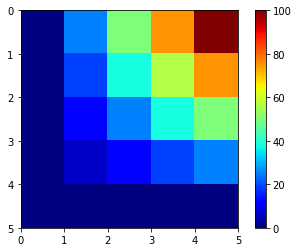

In [146]:
fig, ax = plt.subplots()

plt.pcolor(T, cmap='jet')
plt.colorbar()
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

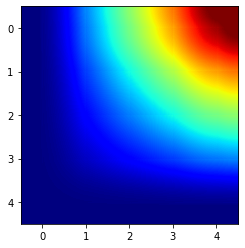

In [147]:
fig, ax = plt.subplots()
ax.imshow(T, interpolation='bessel', cmap='jet')
plt.show()

Tipos de interpolação disponíveis para `imshow`: `nearest`, `bilinear`, `bicubic`, `spline16`,`spline36`, `hanning`, `hamming`, `hermite`, `kaiser`, `quadric`, `catrom`, `gaussian`, `bessel`, `mitchell`, `sinc` e `lanczos`.

A seguir é mostrado um exemplo de algoritmo para montar o sistema.

**Algoritmo parametrizado:** (Colaboração: Jonathan Nogueira <jonathan.wnog@gmail.com>)

In [148]:
# Dados da geometria e malha
lx = 0.5 # largura da placa
ly = 0.5 # altura da placa
n = 10 #subintervalos na direção x, n+1 é o número de colunas
m = 10 #subintervalos na direção y, m+1 é o número de linhas
h = lx/n
k = ly/m
alpha = (h/k)**2
print(alpha)

1.0


In [149]:
# Tamanho da matriz
T = np.zeros([m+1, n+1])

# Condições de contorno (bordas da chapa)
T[0, :] = [200*x for x in np.linspace(0, lx, n+1)]
T[:, -1] = [200*y for y in np.linspace(ly, 0, m+1)]
#print (T)

In [150]:
## teste
#for i in range(0, m-1):
#    for j in range(0, n-1):
#        idx = i*(n-1) + j# indexação das equações
#        print ('i=',i,'j=',j, 'idx=',idx)

In [151]:
# Criação do sistema linear Ax = b
ordem = (m-1)*(n-1)
A = np.zeros((ordem, ordem))
b = np.zeros(ordem)

# Preenchendo A e b com as diferenças finitas
for i in range(0, m-1):
    for j in range(0, n-1):
        idx = i*(n-1) + j# indexação das equações
        A[idx,idx] = 2*(alpha+1)
        if j > 0:
            A[idx, idx-1] = -1      # T[i, j-1]
        if j < n-2:
            A[idx, idx+1] = -1      # T[i, j+1]
        if i < m-2:
            A[idx, idx+(m-1)] = -1  # T[i-1, j]
        if i > 0 and idx>=m-1:
            A[idx, idx-(m-1)] = -1  # T[i+1, j]
#print (A)

k = 0
for i in range(1, n):
    for j in range(1, m):
        b[k] = T[i-1,j] + T[i+1,j] - 4*T[i,j] + T[i,j+1]+ T[i,j-1]
        k += 1
        
#print (b)
S = np.linalg.solve(A, b)
#print(S)

In [152]:
T[1:-1, 1:-1] = S.reshape(m-1,n-1)
print (T)

[[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
 [  0.   9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  0.   7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


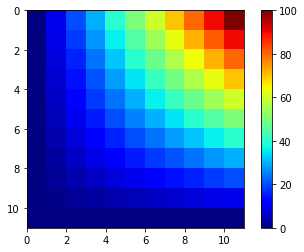

In [153]:
fig, ax = plt.subplots()

plt.pcolor(T, cmap='jet')
plt.colorbar()
ax.invert_yaxis()
ax.set_aspect('equal')
plt.show()

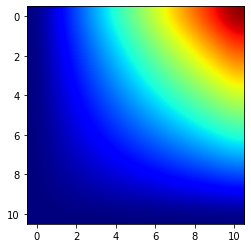

In [154]:
fig, ax = plt.subplots()
ax.imshow(T, interpolation='bicubic', cmap='jet')
plt.show()

**Resolução do exemplo 12.1 (Burden, Richard, L. et al., 2016):** (https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/823)

**Autor:** Jonathan Nogueira (jonathan.wnog@gmail.com)

In [155]:
# Tamanho da matriz
x = y = 5
T = np.zeros([x, y])

# Define os valores da borda (fixo)
T[0, :] = [i * 25 for i in range(0, 5)]
T[:, 4] = [i * 25 for i in range(4, -1, -1)]

# Número de pontos na grade
n = (x-2) * (y-2)  

# Criação do sistema linear Ax = b
A = np.zeros((n, n))
b = np.zeros(n)

# Preenchendo A e b com as diferenças finitas
for i in range(1, x-1):
    for j in range(1, y-1):
        index = (i-1) * (y-2) + (j-1)
        A[index, index] = -4
        if j > 1:
            A[index, (i-1)*(y-2) + (j-2)] = 1  # T[i, j-1]
        if j < y-2:
            A[index, (i-1)*(y-2) + j] = 1      # T[i, j+1]
        if i < x-2:
            A[index, i*(y-2) + (j-1)] = 1      # T[i+1, j]
        if i > 1:
            A[index, (i-2)*(y-2) + (j-1)] = 1  # T[i-1, j]

k = 0
for i in range(1, x-1):
    for j in range(1, y-1):
        b[k] = -(T[i+1, j] - 2*T[i, j] + T[i-1, j]) - (T[i, j+1] - 2*T[i, j] + T[i, j-1])
        k += 1

#print("Matriz A:")
#print(A)
#print("\nVetor b:")
#print(b)

W = np.linalg.solve(A, b)
print(W)


[18.75 37.5  56.25 12.5  25.   37.5   6.25 12.5  18.75]


**Resolução por método iterativo do exemplo 12.1 (Capra e Canalle, 2020):** (https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/823)

**Autor:** Jonathan Nogueira (jonathan.wnog@gmail.com)

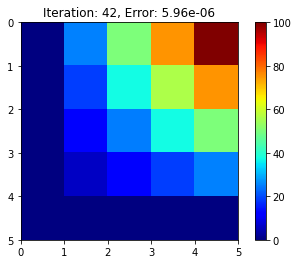

[[  0.          25.          50.          75.         100.        ]
 [  0.          18.74999106  37.49998808  56.24999106  75.        ]
 [  0.          12.49998808  24.99998212  37.49998808  50.        ]
 [  0.           6.24999106  12.49998808  18.74999106  25.        ]
 [  0.           0.           0.           0.           0.        ]]


In [156]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np

N = 100
tol = 1e-5
error = []


T = np.zeros([5, 5])
T[-1, :] = 0
T[:,  0] = 0
T[0, :] = np.arange(0, 101, 25) 
T[:, -1] = np.arange(100, -1, -25)

for n in range(N):
    T_old = T.copy()  # Salva a matriz de temperaturas da iteração anterior
    for i in range(1, len(T)-1):
        for j in range(1, len(T)-1):
            T[i, j] = (T_old[i - 1, j] + T_old[i + 1, j] + T_old[i, j - 1] + T_old[i, j + 1]) / 4

    error.append(np.max(np.abs(T - T_old)))  # Calcula o erro como a diferença máxima entre a matriz atual e a anterior
    
    clear_output(wait=True)
    plt.pcolor(T, cmap='jet')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal')
    plt.title(f"Iteration: {n+1}, Error: {error[-1]:.2e}")
    plt.show()
    
    if error[-1] < tol:
        break
        
print(T)

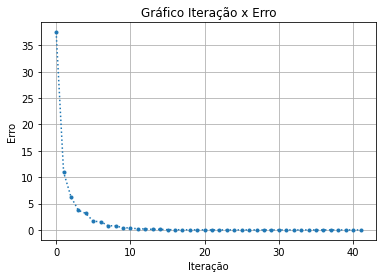

In [157]:
plt.plot(range(len(error)),error, '.:')
plt.grid()

plt.title('Gráfico Iteração x Erro')
plt.ylabel('Erro')
plt.xlabel('Iteração')

plt.show()

### Atividades:
https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/828

**1.** Determine uma solução aproximada da equação diferencial parcial elíptica
$$
\begin{array}{cl}
\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}=0, & 1<x<2, \quad 0<y<1 ; \\
u(x, 0)=2 \ln x, & u(x, 1)=\ln \left(x^2+1\right), \quad 1 \leq x \leq 2 ; \\
u(1, y)=\ln \left(y^2+1\right), & u(2, y)=\ln \left(y^2+4\right), \quad 0 \leq y \leq 1 .
\end{array}
$$

Use $h=k=\frac{1}{3}$ e compare os resultados com a solução real $u(x, y)=\ln \left(x^2+y^2\right)$.